In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

import tensorflow as tf

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
IMAGE_SIZE = 256
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range =10
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size = ( IMAGE_SIZE,IMAGE_SIZE),
    batch_size =  32,
    class_mode = 'sparse',

)

Found 3892 images belonging to 6 classes.


In [4]:
train_generator.class_indices

{'Calculus': 0,
 'Caries': 1,
 'Discoloration': 2,
 'Gingivitis': 3,
 'Hypodontia': 4,
 'Ulcer': 5}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Calculus', 'Caries', 'Discoloration', 'Gingivitis', 'Hypodontia', 'Ulcer']

In [6]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range =10
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size = ( IMAGE_SIZE,IMAGE_SIZE),
    batch_size =  32,
    class_mode = 'sparse',

)

Found 553 images belonging to 6 classes.


In [7]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range =10
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size = ( IMAGE_SIZE,IMAGE_SIZE),
    batch_size =  32,
    class_mode = 'sparse',

)

Found 1118 images belonging to 6 classes.


In [8]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 6

model = models.Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'), 
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)), 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation = 'softmax'),                       
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [10]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']

)

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch = 50,
    batch_size = 32,
    validation_data = validation_generator,
    validation_steps = 6,
    verbose = 1,
    epochs = 50
)

Epoch 1/50
50/50 [==============================] - 159s 3s/step - loss: 1.4071 - accuracy: 0.4150 - val_loss: 1.4477 - val_accuracy: 0.4115
Epoch 2/50
50/50 [==============================] - 181s 4s/step - loss: 1.3315 - accuracy: 0.4644 - val_loss: 1.3795 - val_accuracy: 0.3750
Epoch 3/50
50/50 [==============================] - 230s 5s/step - loss: 1.1546 - accuracy: 0.5369 - val_loss: 1.0472 - val_accuracy: 0.5990
Epoch 4/50
50/50 [==============================] - 242s 5s/step - loss: 1.0172 - accuracy: 0.6000 - val_loss: 1.0314 - val_accuracy: 0.6250
Epoch 5/50
50/50 [==============================] - 231s 5s/step - loss: 0.9666 - accuracy: 0.5970 - val_loss: 0.9255 - val_accuracy: 0.5885
Epoch 6/50
50/50 [==============================] - 234s 5s/step - loss: 0.9723 - accuracy: 0.6045 - val_loss: 0.9543 - val_accuracy: 0.5469
Epoch 7/50
50/50 [==============================] - 240s 5s/step - loss: 0.9103 - accuracy: 0.6436 - val_loss: 0.8968 - val_accuracy: 0.6510
Epoch 8/50
50

In [12]:
scores = model.evaluate(test_generator)

35/35 [==============================] - 42s 1s/step - loss: 0.6817 - accuracy: 0.7433


In [13]:
scores

[0.6816782355308533, 0.7432916164398193]

In [14]:
history

In [15]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 50}

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
type(history.history['loss'])

list

In [18]:
len(history.history['loss'])

50

In [19]:
history.history['loss'][:5]  #show loss of first 5 epochs

[1.407057523727417,
 1.3314968347549438,
 1.1545603275299072,
 1.0171641111373901,
 0.9665994048118591]

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [21]:
val_acc

[0.4114583432674408,
 0.375,
 0.5989583134651184,
 0.625,
 0.5885416865348816,
 0.546875,
 0.6510416865348816,
 0.625,
 0.65625,
 0.6458333134651184,
 0.609375,
 0.65625,
 0.8072916865348816,
 0.7604166865348816,
 0.7708333134651184,
 0.6875,
 0.7552083134651184,
 0.6875,
 0.75,
 0.7447916865348816,
 0.671875,
 0.7239583134651184,
 0.7708333134651184,
 0.71875,
 0.7760416865348816,
 0.734375,
 0.7395833134651184,
 0.7552083134651184,
 0.7239583134651184,
 0.78125,
 0.7239583134651184,
 0.75,
 0.796875,
 0.828125,
 0.7916666865348816,
 0.8177083134651184,
 0.8072916865348816,
 0.78125,
 0.7604166865348816,
 0.7708333134651184,
 0.78125,
 0.7395833134651184,
 0.7708333134651184,
 0.8229166865348816,
 0.7916666865348816,
 0.7447916865348816,
 0.8020833134651184,
 0.75,
 0.8229166865348816,
 0.7864583134651184]

In [22]:
acc

[0.41499999165534973,
 0.46437498927116394,
 0.5368750095367432,
 0.6000000238418579,
 0.5969773530960083,
 0.6045340299606323,
 0.6435768008232117,
 0.675000011920929,
 0.6561712622642517,
 0.6870276927947998,
 0.6812499761581421,
 0.6926952004432678,
 0.7250000238418579,
 0.7131249904632568,
 0.7081249952316284,
 0.7193750143051147,
 0.7325000166893005,
 0.74055415391922,
 0.7543749809265137,
 0.7216624617576599,
 0.7612500190734863,
 0.7662500143051147,
 0.7649999856948853,
 0.7637500166893005,
 0.756926953792572,
 0.7837499976158142,
 0.764483630657196,
 0.7739294767379761,
 0.7699999809265137,
 0.7925000190734863,
 0.7875000238418579,
 0.7987499833106995,
 0.7827455997467041,
 0.7962499856948853,
 0.8100000023841858,
 0.8047859072685242,
 0.8047859072685242,
 0.8125,
 0.8143749833106995,
 0.8118749856948853,
 0.8205289840698242,
 0.8318750262260437,
 0.8293451070785522,
 0.8337531685829163,
 0.8293750286102295,
 0.8324937224388123,
 0.8255667686462402,
 0.8218749761581421,
 0.8180

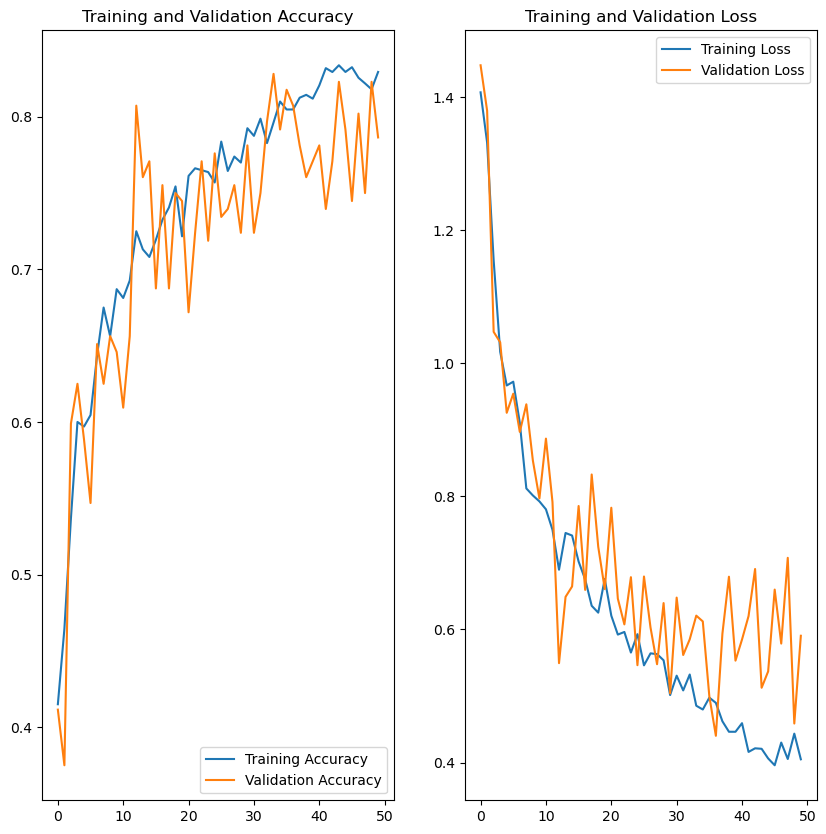

In [24]:
EPOCHS = 50

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Calculus
1/1 [==============================] - 1s 949ms/step
predicted label: Calculus


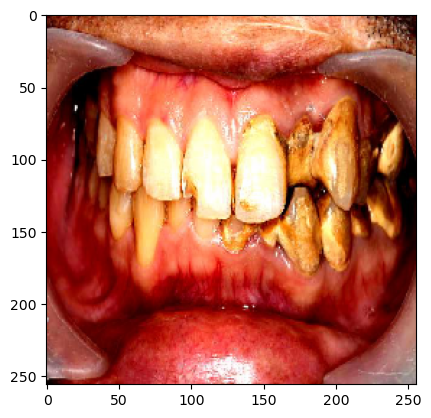

In [25]:
# run Predicition on a Sample Image

import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break  

In [26]:
# function for interference 
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 50ms/step


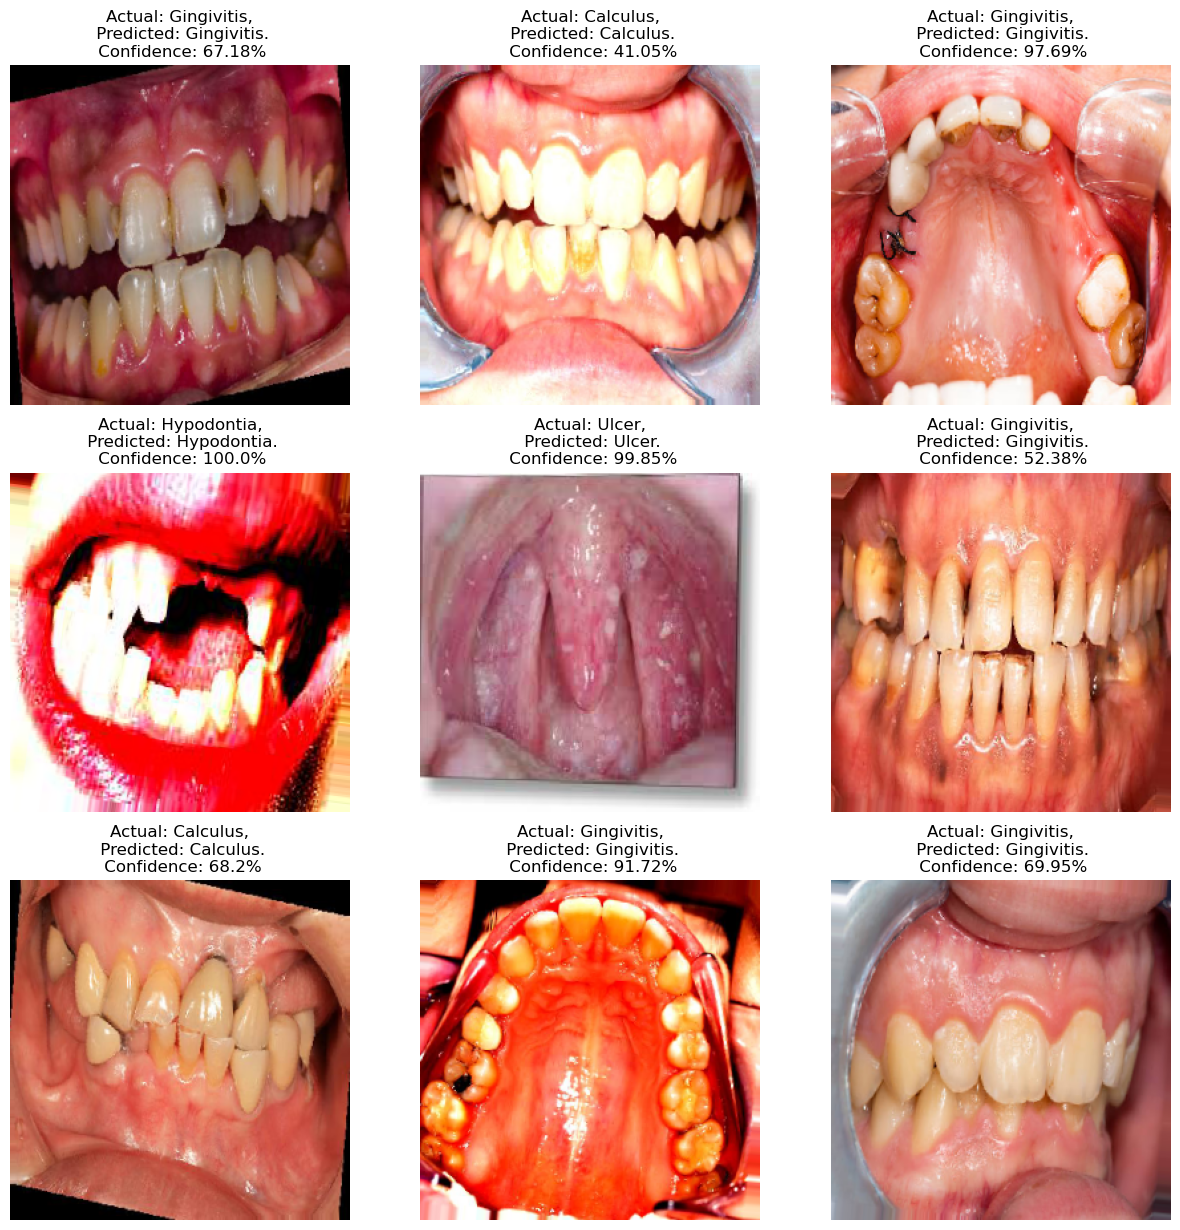

In [31]:
# running interfernce on a few sample images

plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break